In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
train_path="dataset\gedung_elektro_3/train"
test_path="dataset\gedung_elektro_3/test"
val_path="dataset\gedung_elektro_3/validation"

In [4]:
x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [5]:
IMAGE_SIZE = [224,224]

In [6]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [7]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
rotation_range=10,
horizontal_flip=True,
brightness_range=[0.4,1.5],
fill_mode='nearest',
zoom_range=0.2,
width_shift_range=0.2,
height_shift_range=0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 2934 images belonging to 4 classes.
Found 894 images belonging to 4 classes.
Found 731 images belonging to 4 classes.


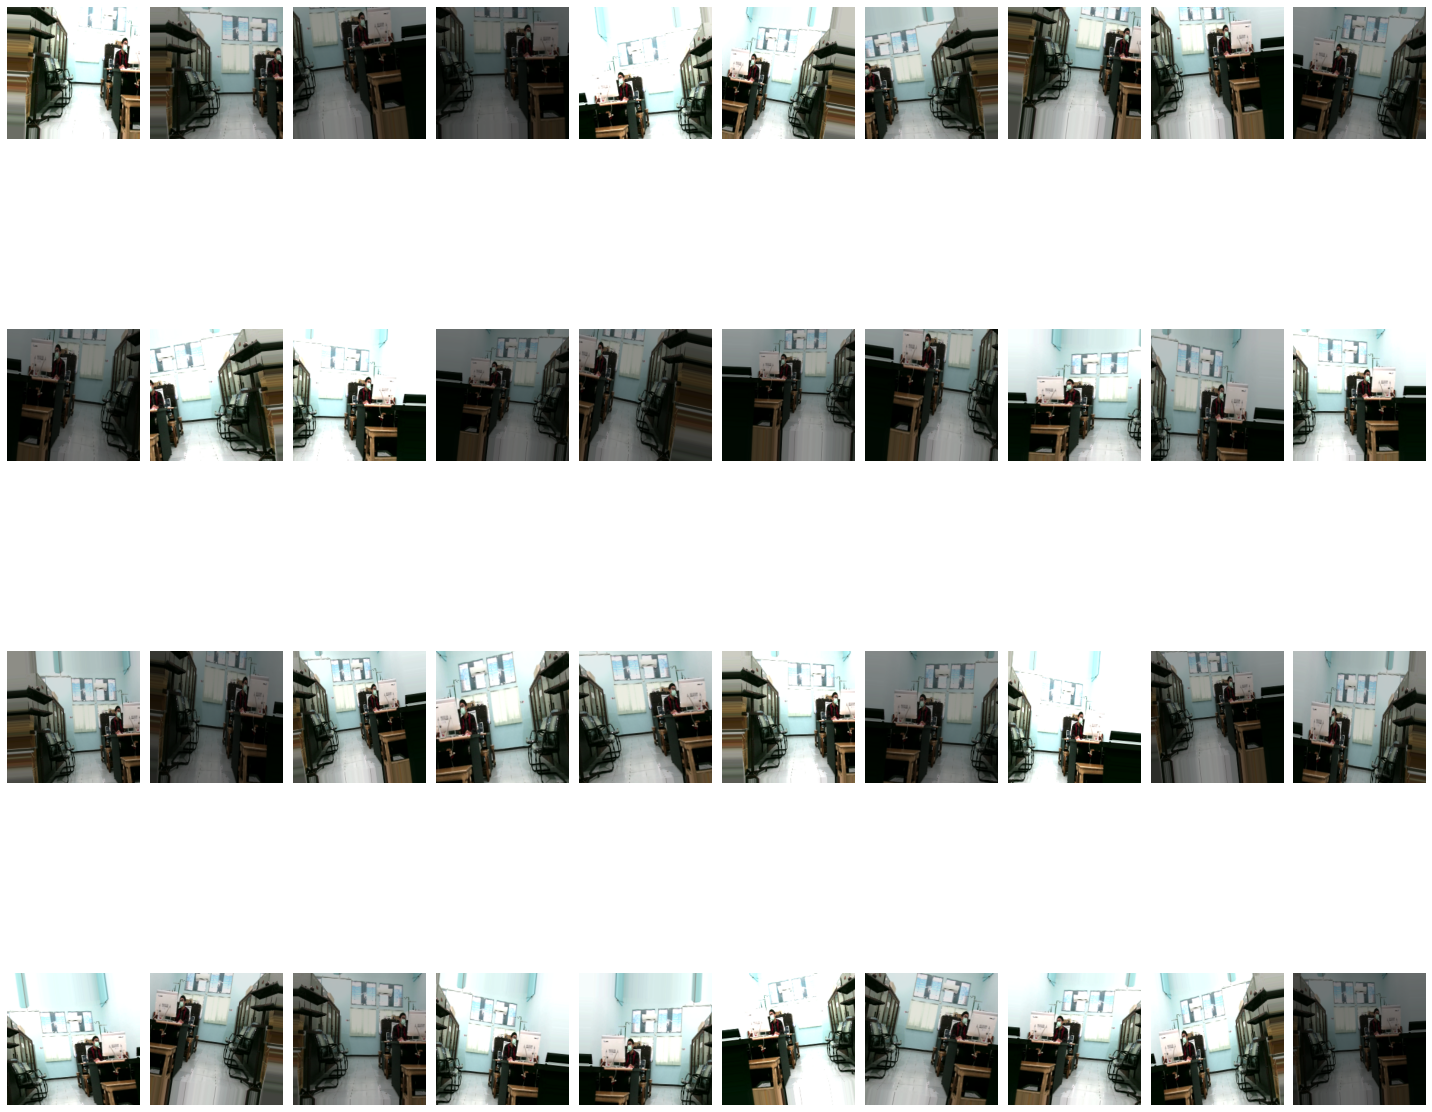

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(4,10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
augmented_images = [training_set[0][0][0] for i in range(40)]
plotImages(augmented_images)

In [11]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [12]:
training_set.class_indices

{'classroom': 0, 'corridor': 1, 'labelka': 2, 'labpower': 3}

In [13]:
train_y.shape,test_y.shape,val_y.shape

((2934,), (894,), (731,))

In [14]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [15]:
for layer in vgg.layers:
    layer.trainable = False

In [16]:
x = Flatten()(vgg.output)

In [17]:
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [19]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [20]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [22]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  epochs=50,
  callbacks = [early_stop],
  batch_size=16,shuffle=True)

Epoch 1/50
184/184 [==============================] - 17s 28ms/step - loss: 0.5075 - accuracy: 0.9536 - val_loss: 0.2914 - val_accuracy: 0.9808
Epoch 2/50
184/184 [==============================] - 4s 23ms/step - loss: 0.0394 - accuracy: 0.9939 - val_loss: 0.2168 - val_accuracy: 0.9850
Epoch 3/50
184/184 [==============================] - 4s 23ms/step - loss: 0.0634 - accuracy: 0.9942 - val_loss: 0.1850 - val_accuracy: 0.9945
Epoch 4/50
184/184 [==============================] - 4s 23ms/step - loss: 0.0059 - accuracy: 0.9993 - val_loss: 0.2108 - val_accuracy: 0.9918
Epoch 5/50
184/184 [==============================] - 4s 23ms/step - loss: 0.0253 - accuracy: 0.9976 - val_loss: 0.1724 - val_accuracy: 0.9932
Epoch 6/50
184/184 [==============================] - 4s 23ms/step - loss: 6.4453e-07 - accuracy: 1.0000 - val_loss: 0.1715 - val_accuracy: 0.9932
Epoch 7/50
184/184 [==============================] - 4s 23ms/step - loss: 3.2925e-07 - accuracy: 1.0000 - val_loss: 0.1713 - val_accurac

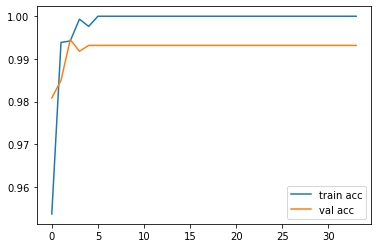

In [23]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('vgg16-acc-rps-1.png')

plt.show()

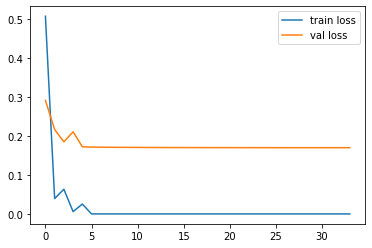

In [24]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('vgg16-loss-rps-1.png')
plt.show()

In [25]:
model.evaluate(test_x,test_y,batch_size=8)

112/112 [==============================] - 1s 11ms/step - loss: 0.0810 - accuracy: 0.9966


[0.08103108406066895, 0.9966443181037903]

In [26]:
model.save('C:\TA/VPR_VGG16_ES.h5')

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [28]:
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

28/28 [==============================] - 2s 33ms/step


In [29]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       170
           1       1.00      1.00      1.00       322
           2       1.00      0.99      0.99       201
           3       1.00      1.00      1.00       201

    accuracy                           1.00       894
   macro avg       1.00      1.00      1.00       894
weighted avg       1.00      1.00      1.00       894



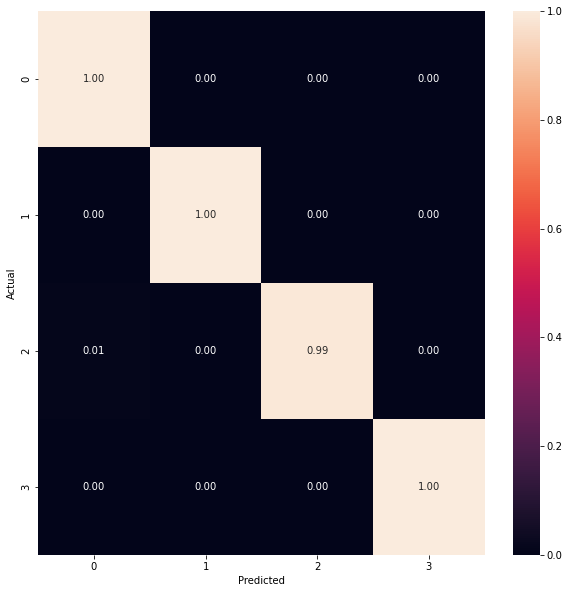

[[170   0   0   0]
 [  1 321   0   0]
 [  2   0 199   0]
 [  0   0   0 201]]


In [30]:
import seaborn as sns
cm = confusion_matrix(y_pred,test_y)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)
print(cm)